# beta 衰变寿命及数目

In [1]:
//%jsroot on
TFile *ipf = new TFile("../MergedData/decay47_128.root");
TTree *tree = (TTree*)ipf->Get("tree");
TCanvas *c1 = new TCanvas;


****************************************
Minimizer is Linear / Migrad
Chi2                      =      84.4561
NDf                       =           99
p0                        =      5137.02   +/-   7.1673      


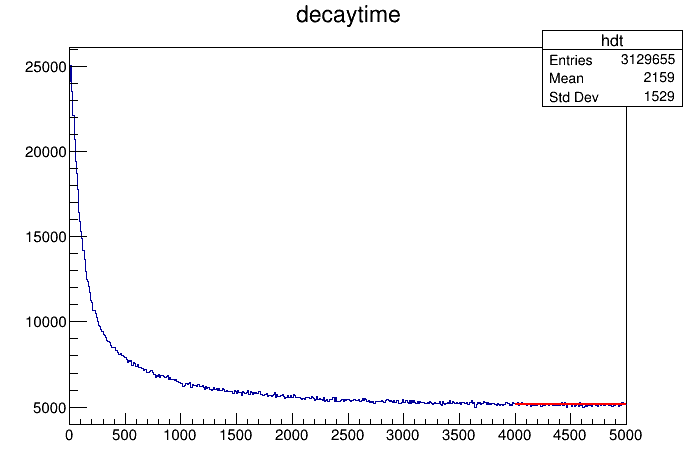

In [2]:
tree->Draw("decaytime>>hdt(500,0,5000)");
hdt->Fit("pol0","","",4000,5000);
TF1 *f0 = (TF1*)hdt->GetFunction("pol0");
c1->SetLogy(0);
c1->Draw();

## 拟合衰变曲线各个成分的贡献

In [3]:
Double_t par_c = f0->GetParameter(0);
Double_t lambda[4];
Double_t Pb[3];
Double_t Pn[2];

Pb[0] = 0.907;//母核的beta衰变分支比
Pn[0] = 1-Pb[0];//母核的beta-n衰变分支比
Pb[1] = Pb[0];//beta子核的beta衰变分支比
Pn[1] = 1-Pb[1];//beta子核的beta-n衰变分支比
Pb[2] = Pb[0];//beta-n子核的beta衰变分支比

lambda[0]=log(2)/280;//beta子核的衰变常数
lambda[1]=log(2)/370;//beta-n子核的衰变常数
lambda[2]=log(2)/840;//beta孙子核的衰变常数
lambda[3]=log(2)/1090;//beta-n子核的beta子核的衰变常数

In [4]:
TString s1 = "[0]+[1]*TMath::Exp(-x*[2])";
TString s2, s5, s3, s61, s62;
s2.Form("+ [1] * %f * %f * (TMath::Exp(-[2] * x) / (%f - [2]) + TMath::Exp(-%f * x) / ([2] - %f))",
        Pb[0], lambda[0], lambda[0], lambda[0], lambda[0]);
s5.Form("+ [1] * %f * %f * (TMath::Exp(-[2] * x) / (%f - [2]) + TMath::Exp(-%f * x) / ([2] - %f))",
        Pn[0], lambda[1], lambda[1], lambda[1], lambda[1]);
s3.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-[2] * x) / ((%f - [2])*(%f - [2])) + TMath::Exp(-%f * x) / (([2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / (([2] - %f)*(%f - %f)))",
        Pb[0], Pb[1], lambda[0], lambda[2], lambda[0], lambda[2], lambda[0], lambda[0], lambda[2], lambda[0], lambda[2], lambda[2], lambda[0], lambda[2] );
s61.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-[2] * x) / ((%f - [2])*(%f - [2])) + TMath::Exp(-%f * x) / (([2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / (([2] - %f)*(%f - %f)))",
         Pb[0], Pn[1], lambda[0], lambda[3], lambda[0], lambda[3], lambda[0], lambda[0], lambda[3], lambda[0], lambda[3], lambda[3], lambda[0], lambda[3]);
s62.Form("+ [1] * %f * %f * %f * %f * (TMath::Exp(-[2] * x) / ((%f - [2])*(%f - [2])) + TMath::Exp(-%f * x) / (([2] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / (([2] - %f)*(%f - %f)))",
         Pn[0], Pb[2], lambda[1], lambda[3], lambda[1], lambda[3], lambda[1], lambda[1], lambda[3], lambda[1], lambda[3], lambda[3], lambda[1], lambda[3]);

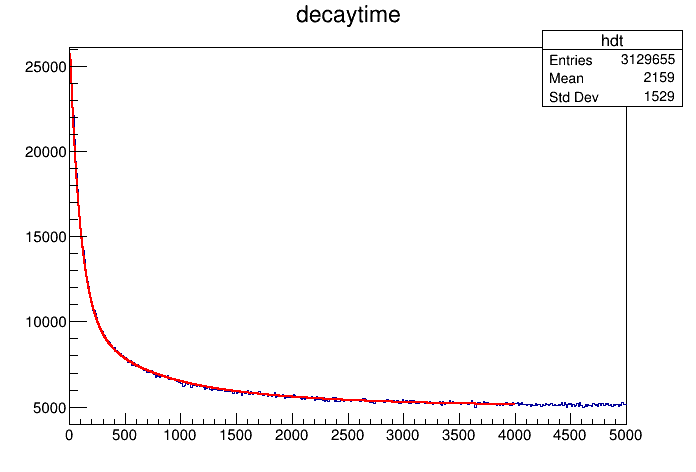

 FCN=372.711 FROM MIGRAD    STATUS=CONVERGED     111 CALLS         112 TOTAL
                     EDM=5.13945e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           5.03518e+03   4.68602e+00   7.14341e-06   8.09788e-01
   2  p1           2.26225e+04   1.12578e+02   1.01765e-05   7.28130e-01
   3  p2           1.09420e-02   5.56859e-05   8.03102e-06  -1.14498e+00


In [5]:
//%jsroot on
int maxT = 4000;
TF1 *f = new TF1("f",s1+s2+s5+s3+s61+s62,10,maxT);
f->SetNpx(5000);
f->SetParameter(0, par_c);
f->SetParLimits(0, 0, par_c*2);
f->SetParameter(1, 100);
f->SetParLimits(1, 0, 1e5);
f->SetParameter(2, log(2)/60);
f->SetParLimits(2, 0, log(2)/10);
hdt->Fit(f, "R");
c1->Draw();

In [6]:
%jsroot off

In [7]:
TString ss1 = "[0]*TMath::Exp(-x*[1])";
TF1* f1 = new TF1("f1", ss1 , 0, maxT);
f1->SetParameter(0, f->GetParameter(1));
f1->SetParameter(1, f->GetParameter(2));
f1->SetLineColor(kBlue);
f1->Draw();
hdt->Draw("same");

In [8]:
TString ss2;
ss2.Form("[0]*%f*%f*(TMath::Exp(-[1]*x) / (%f-[1]) + TMath::Exp(-%f*x) / ([1]-%f))",
         lambda[0], Pb[0], lambda[0], lambda[0], lambda[0]);
TF1* f2 = new TF1("f2", ss2, 0, maxT);
f2->SetParameter(0, f->GetParameter(1));
f2->SetParameter(1, f->GetParameter(2));
f2->SetLineColor(kGreen);
f2->Draw("same");

In [9]:
TString ss5;
ss5.Form("[0] * %f *%f * (TMath::Exp(-[1] * x) / (%f - [1]) + TMath::Exp(-%f * x) / ([1] - %f))", lambda[1], Pn[0], lambda[1], lambda[1], lambda[1]);
TF1* f5 = new TF1("f5", ss5, 0, maxT);
f5->SetParameter(0, f->GetParameter(1));
f5->SetParameter(1, f->GetParameter(2));
f5->SetLineColor(kYellow);
f5->Draw("same");

In [10]:
TString ss3,ss61,ss62;
ss3.Form("[0] * %f * %f * %f * %f * (TMath::Exp(-[1] * x) / ((%f - [1])*(%f - [1])) + TMath::Exp(-%f * x) / (([1] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / (([1] - %f)*(%f - %f)))",Pb[0], Pb[1], lambda[0], lambda[2], lambda[0], lambda[2], lambda[0], lambda[0], lambda[2], lambda[0], lambda[2], lambda[2], lambda[0], lambda[2]);
ss61.Form("+[0] * %f * %f * %f * %f * (TMath::Exp(-[1] * x) / ((%f - [1])*(%f - [1])) + TMath::Exp(-%f * x) / (([1] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / (([1] - %f)*(%f - %f)))",Pb[0], Pn[1], lambda[0], lambda[3], lambda[0], lambda[3], lambda[0], lambda[0], lambda[3], lambda[0], lambda[3], lambda[3], lambda[0], lambda[3]);
ss62.Form("+[0] * %f * %f * %f * %f * (TMath::Exp(-[1] * x) / ((%f - [1])*(%f - [1])) + TMath::Exp(-%f * x) / (([1] - %f)*(%f - %f))+ TMath::Exp(-%f * x) / (([1] - %f)*(%f - %f)))",Pn[0], Pb[2], lambda[1], lambda[3], lambda[1], lambda[3], lambda[1], lambda[1], lambda[3], lambda[1], lambda[3], lambda[3], lambda[1], lambda[3]);
TF1* f36 = new TF1("f36", ss3+ss61+ss62, 0, maxT);
f36->SetParameter(0, f->GetParameter(1));
f36->SetParameter(1, f->GetParameter(2));
f36->SetLineColor(kPink);
f36->Draw("same");

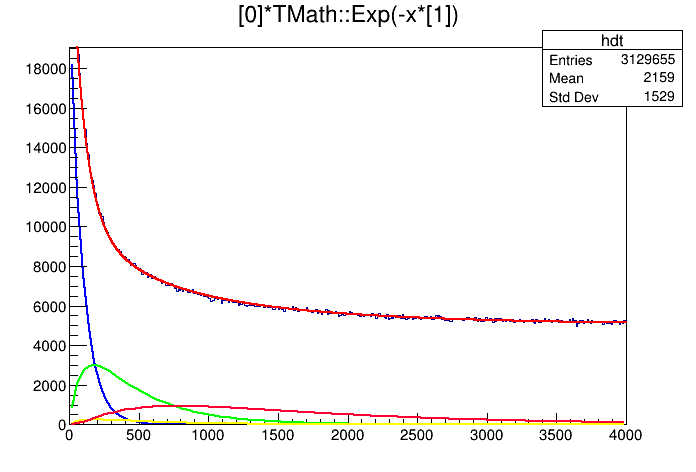

Beta halflife: 63.3472 +- 0.322386

In [11]:
c1->Draw();
cout<<"Beta halflife: "<<log(2)/f->GetParameter(2)<<" +- "<<log(2)/f->GetParameter(2)*f->GetParError(2)/f->GetParameter(2);

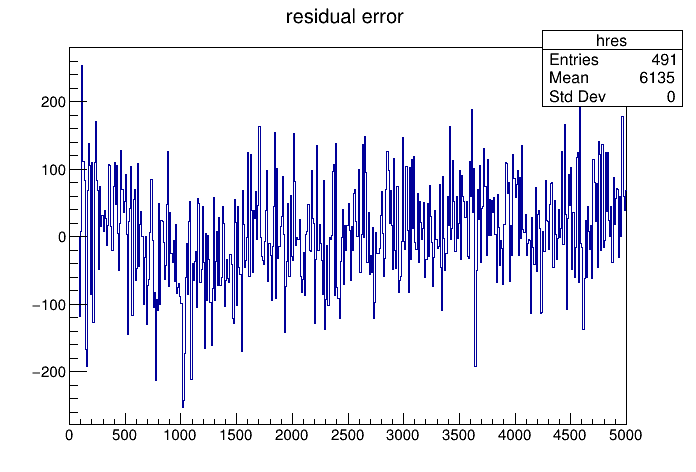

In [12]:
TH1F *hres = new TH1F("hres","residual error",500,0,5000);
for (int i=10; i<=500; i++){
    hres->SetBinContent(i, hdt->GetBinContent(i) - f->Eval(hdt->GetBinLowEdge(i)+(double)hdt->GetBinWidth(i)/2));
}
hres->Draw();
c1->Draw();

## 计算beta数目

In [13]:
double x,sum;

In [14]:
x = 250;
sum = f1->Integral(0,x)/hdt->GetBinWidth(1)/(1-exp(-f1->GetParameter(1)*x));
cout<<"Beta number: "<<f1->Integral(0,x)/hdt->GetBinWidth(1)<<endl;
cout<<"Normalized beta number: "<<sum<<endl;

Beta number: 193339
Normalized beta number: 206749
